<a href="https://colab.research.google.com/github/duytan118/AI/blob/BTVN/AI_powered_medical_diagnosis_skin_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Khai báo và sử dụng các thư viện sau

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from glob import glob
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator


In [21]:
%cd /content/drive/MyDrive/Colab Notebooks/FINAL/FINAL/UNG THƯ DA/

/content/drive/MyDrive/Colab Notebooks/FINAL/FINAL/UNG THƯ DA


In [27]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [28]:
training=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/FINAL/FINAL/UNG THƯ DA/TRAIN',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 60 images belonging to 3 classes.


In [29]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/FINAL/FINAL/UNG THƯ DA/VALIDATION',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 60 images belonging to 3 classes.


In [30]:
training.class_indices

{'UNG THƯ BIỂU MÔ TẾ BÀO VẢY(SQUAMOUS CELL CARCINOMA)': 0,
 'UNG THƯ BIỂU MÔ TẾ BÀO ĐÁY(BASAL CELL CARCINOMA)': 1,
 'UNG THƯ CÁC TUYẾN PHỤ THUỘC DA(ADNEXAL GLAND TUMORS)': 2}

In [31]:
validation.class_indices

{'UNG THƯ BIỂU MÔ TẾ BÀO VẢY(SQUAMOUS CELL CARCINOMA)': 0,
 'UNG THƯ BIỂU MÔ TẾ BÀO ĐÁY(BASAL CELL CARCINOMA)': 1,
 'UNG THƯ CÁC TUYẾN PHỤ THUỘC DA(ADNEXAL GLAND TUMORS)': 2}

In [34]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [36]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học 64 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng học 
history=model.fit(training,epochs=500,batch_size=64,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
2/2 [==============================] - 28s 697ms/step - loss: 1.9598 - accuracy: 0.5167 - val_loss: 2.0726 - val_accuracy: 0.3333
Epoch 2/500
2/2 [==============================] - 1s 746ms/step - loss: 1.9533 - accuracy: 0.3167 - val_loss: 1.1870 - val_accuracy: 0.3333
Epoch 3/500
2/2 [==============================] - 1s 705ms/step - loss: 1.1243 - accuracy: 0.4000 - val_loss: 1.0913 - val_accuracy: 0.4167
Epoch 4/500
2/2 [==============================] - 1s 698ms/step - loss: 1.0963 - accuracy: 0.4167 - val_loss: 1.0891 - val_accuracy: 0.3333
Epoch 5/500
2/2 [==============================] - 1s 931ms/step - loss: 1.0844 - accuracy: 0.3500 - val_loss: 1.0731 - val_accuracy: 0.5167
Epoch 6/500
2/2 [==============================] - 2s 2s/step - loss: 1.0811 - accuracy: 0.5500 - val_loss: 1.0457 - val_accuracy: 0.5167
Epoch 7/500
2/2 [==============================] - 1s 680ms/step - loss: 1.0730 - accuracy: 0.3333 - val_loss: 1.0294 - val_accuracy: 0.4167
Epoch 8/500
2/2

In [37]:
# Lưu 
model.save("FINAL.h5")
model_1=load_model('FINAL.h5')

In [38]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.024474017322063446
Train Accuracy 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

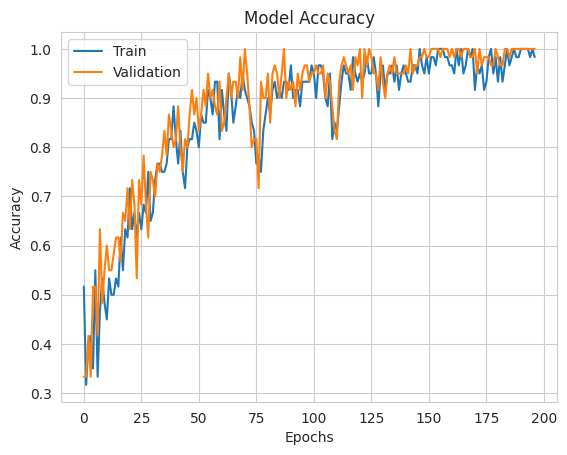

In [39]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

1/1 [==============================] - 0s 390ms/step
UNG THƯ BIỂU MÔ TẾ BÀO ĐÁY(BASAL CELL CARCINOMA)


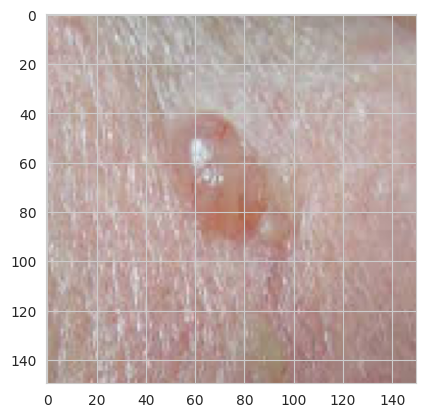

1/1 [==============================] - 0s 24ms/step
UNG THƯ CÁC TUYẾN PHỤ THUỘC DA(ADNEXAL GLAND TUMORS)


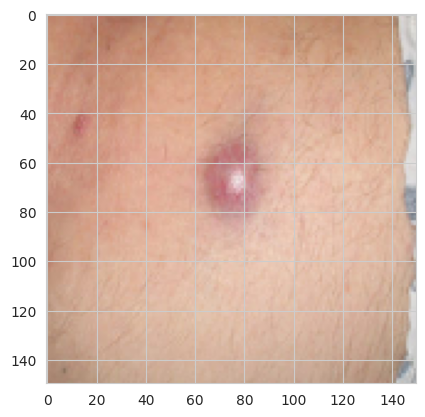

1/1 [==============================] - 0s 21ms/step
UNG THƯ BIỂU MÔ TẾ BÀO ĐÁY(BASAL CELL CARCINOMA)


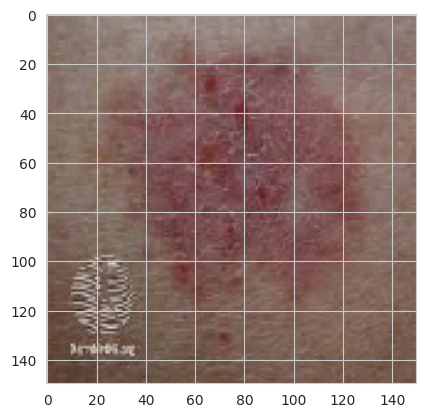

1/1 [==============================] - 0s 20ms/step
UNG THƯ BIỂU MÔ TẾ BÀO ĐÁY(BASAL CELL CARCINOMA)


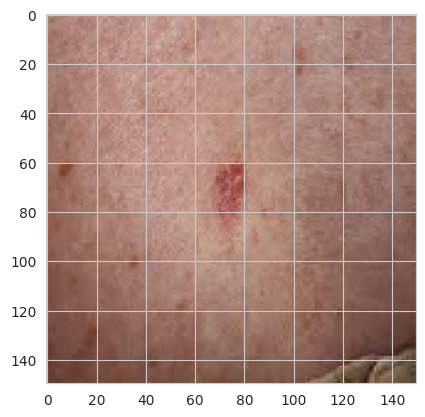

1/1 [==============================] - 0s 20ms/step
UNG THƯ BIỂU MÔ TẾ BÀO ĐÁY(BASAL CELL CARCINOMA)


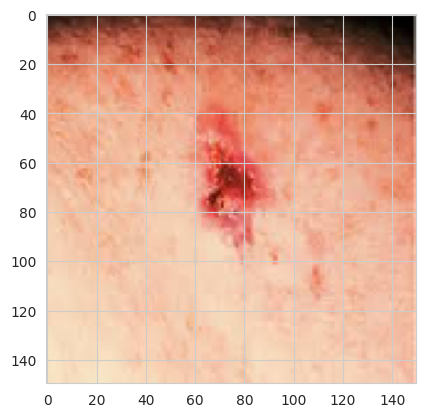

1/1 [==============================] - 0s 19ms/step
UNG THƯ CÁC TUYẾN PHỤ THUỘC DA(ADNEXAL GLAND TUMORS)


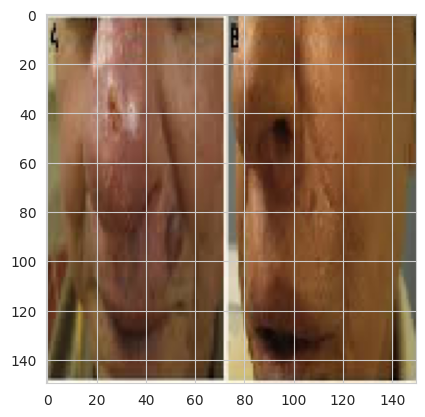

1/1 [==============================] - 0s 19ms/step
UNG THƯ CÁC TUYẾN PHỤ THUỘC DA(ADNEXAL GLAND TUMORS)


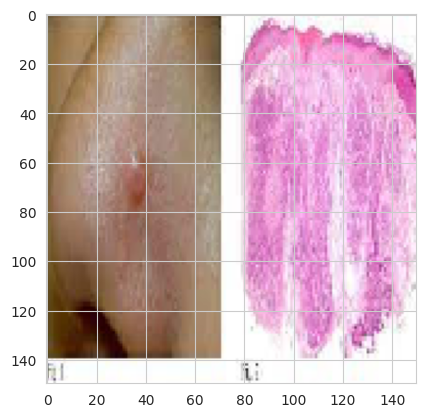

1/1 [==============================] - 0s 20ms/step
UNG THƯ CÁC TUYẾN PHỤ THUỘC DA(ADNEXAL GLAND TUMORS)


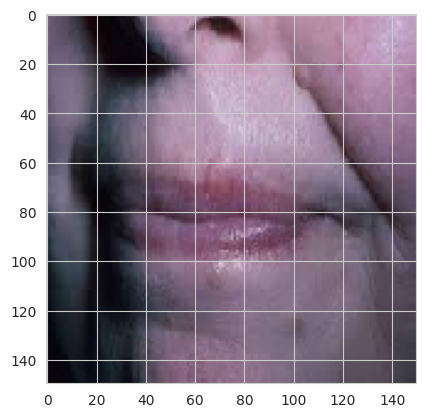

1/1 [==============================] - 0s 26ms/step
UNG THƯ CÁC TUYẾN PHỤ THUỘC DA(ADNEXAL GLAND TUMORS)


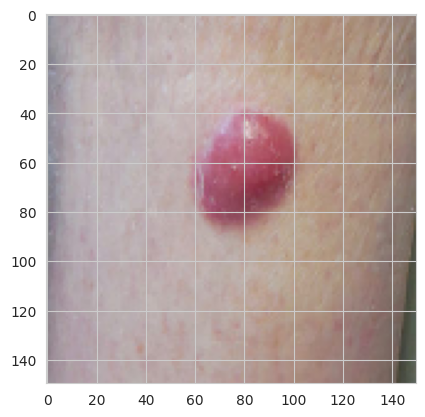

1/1 [==============================] - 0s 40ms/step
UNG THƯ CÁC TUYẾN PHỤ THUỘC DA(ADNEXAL GLAND TUMORS)


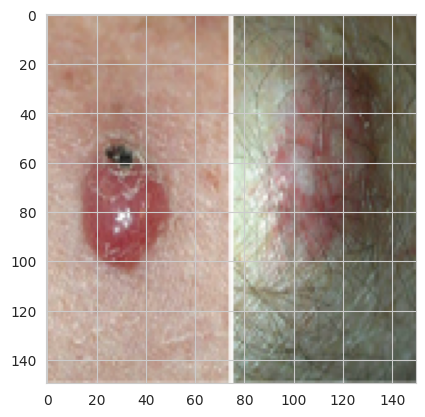

1/1 [==============================] - 0s 24ms/step
UNG THƯ CÁC TUYẾN PHỤ THUỘC DA(ADNEXAL GLAND TUMORS)


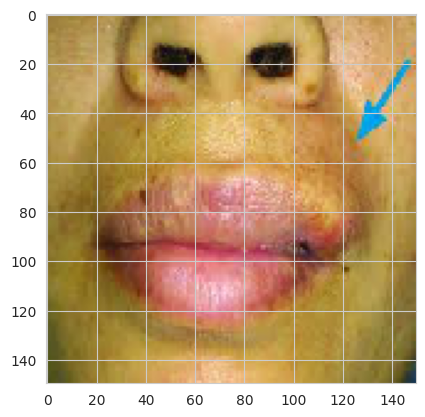

1/1 [==============================] - 0s 20ms/step
UNG THƯ BIỂU MÔ TẾ BÀO VẢY(SQUAMOUS CELL CARCINOMA)


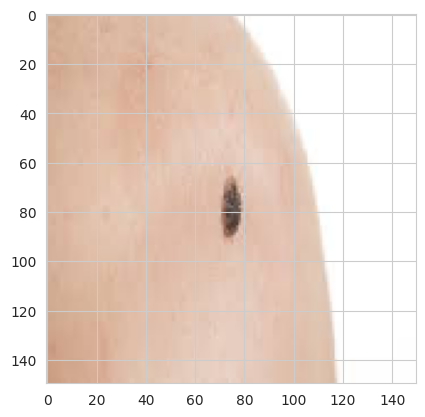

1/1 [==============================] - 0s 22ms/step
UNG THƯ BIỂU MÔ TẾ BÀO VẢY(SQUAMOUS CELL CARCINOMA)


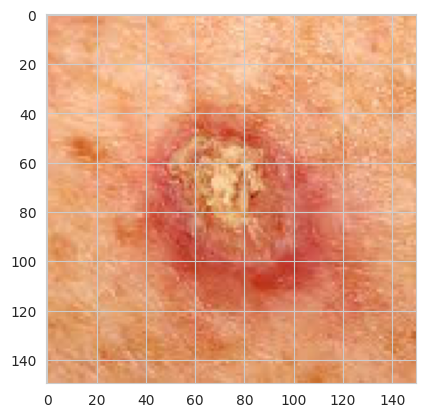

1/1 [==============================] - 0s 20ms/step
UNG THƯ BIỂU MÔ TẾ BÀO VẢY(SQUAMOUS CELL CARCINOMA)


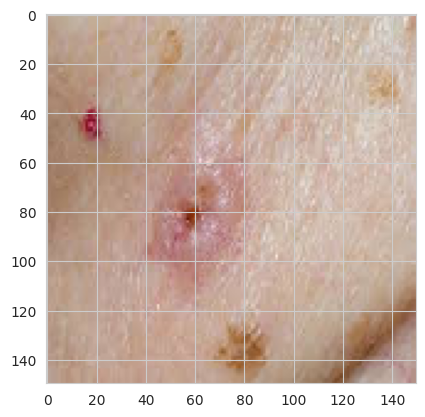

1/1 [==============================] - 0s 20ms/step
UNG THƯ BIỂU MÔ TẾ BÀO VẢY(SQUAMOUS CELL CARCINOMA)


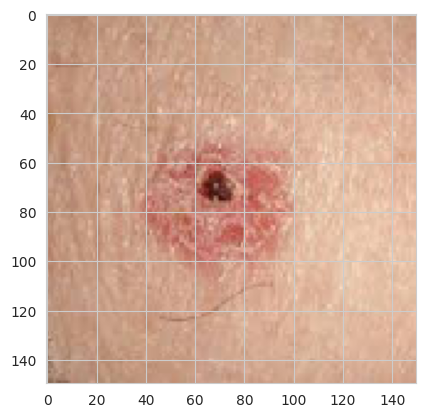

1/1 [==============================] - 0s 20ms/step
UNG THƯ BIỂU MÔ TẾ BÀO VẢY(SQUAMOUS CELL CARCINOMA)


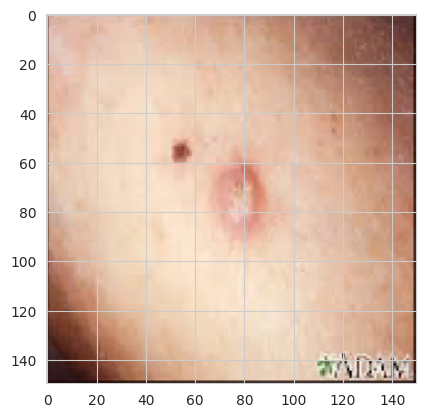

1/1 [==============================] - 0s 31ms/step
UNG THƯ BIỂU MÔ TẾ BÀO ĐÁY(BASAL CELL CARCINOMA)


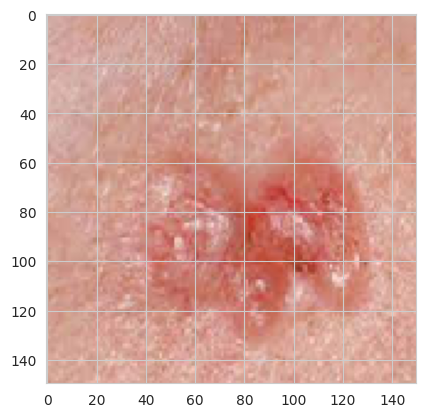

1/1 [==============================] - 0s 19ms/step
UNG THƯ BIỂU MÔ TẾ BÀO ĐÁY(BASAL CELL CARCINOMA)


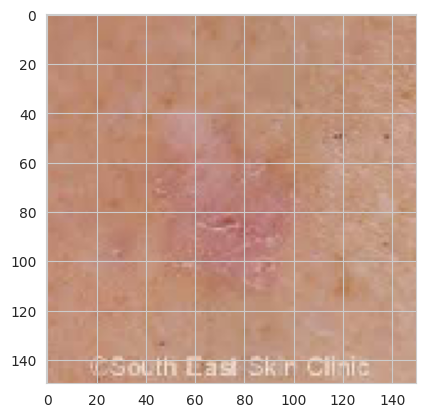

1/1 [==============================] - 0s 22ms/step
UNG THƯ BIỂU MÔ TẾ BÀO VẢY(SQUAMOUS CELL CARCINOMA)


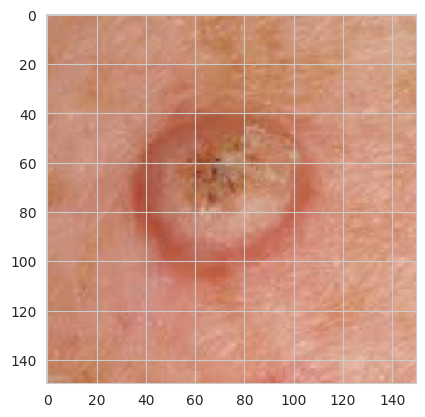

1/1 [==============================] - 0s 21ms/step
UNG THƯ BIỂU MÔ TẾ BÀO VẢY(SQUAMOUS CELL CARCINOMA)


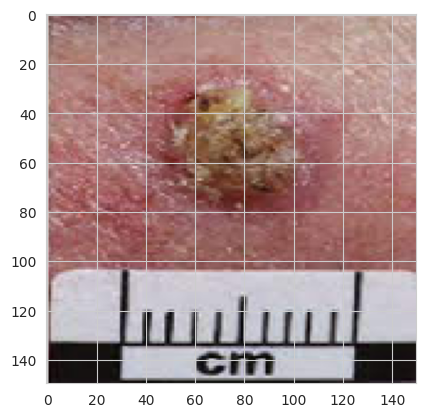

1/1 [==============================] - 0s 20ms/step
UNG THƯ BIỂU MÔ TẾ BÀO ĐÁY(BASAL CELL CARCINOMA)


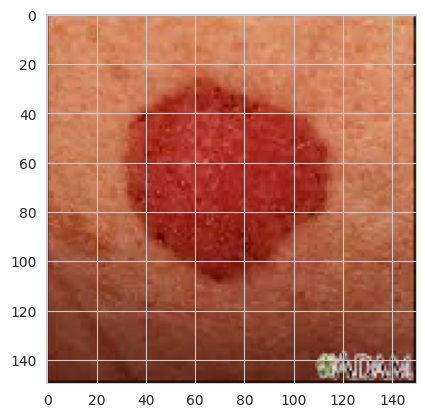

In [43]:
test="/content/drive/MyDrive/Colab Notebooks/FINAL/FINAL/UNG THƯ DA/TEST"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['UNG THƯ BIỂU MÔ TẾ BÀO VẢY(SQUAMOUS CELL CARCINOMA)','UNG THƯ BIỂU MÔ TẾ BÀO ĐÁY(BASAL CELL CARCINOMA)','UNG THƯ CÁC TUYẾN PHỤ THUỘC DA(ADNEXAL GLAND TUMORS)']
  print(class_name[result])
  plt.show()